Passo 1. Carregue os dados e prepare-os para a análise

In [2]:
import pandas as pd
import numpy as np
visits_df = pd.read_csv(
    'visits_log_us.csv',
    dtype={'Device': 'category', 'Source Id': 'int64'},
    parse_dates=['Start Ts', 'End Ts']
)

orders_df = pd.read_csv(
    'orders_log_us.csv',
    parse_dates=['Buy Ts']
)

costs_df = pd.read_csv(
    'costs_us.csv',
    parse_dates=['dt']
)

print("Visits DataFrame Info:")
visits_df.info(memory_usage='deep')

print("\nOrders DataFrame Info:")
orders_df.info(memory_usage='deep')

print("\nCosts DataFrame Info:")
costs_df.info(memory_usage='deep')
# Leitura dos arquivos com caminhos corretos
visits = pd.read_csv('visits_log_us.csv')
orders = pd.read_csv('orders_log_us.csv')
costs = pd.read_csv('costs_us.csv')

# Normalização de colunas
def normalize_cols(df):
    df = df.copy()
    df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
    return df

visits = normalize_cols(visits)
orders = normalize_cols(orders)
costs = normalize_cols(costs)

# Conversão de datas
if 'start_ts' in visits.columns:
    visits['start_ts'] = pd.to_datetime(visits['start_ts'])
if 'end_ts' in visits.columns:
    visits['end_ts'] = pd.to_datetime(visits['end_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])


Visits DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB

Orders DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

Costs DataFrame Info:

Otimizando Dados em pandas

Na próxima celula irei otimizar dados de memória em pandas.

In [3]:
visits_df = pd.read_csv(
    'visits_log_us.csv',
    dtype={'Device': 'category', 'Source Id': 'int64'},
    parse_dates=['Start Ts', 'End Ts']
)

orders_df = pd.read_csv(
    'orders_log_us.csv',
    parse_dates=['Buy Ts']
)

costs_df = pd.read_csv(
    'costs_us.csv',
    parse_dates=['dt']
)

print("Visits DataFrame Info:")
visits_df.info(memory_usage='deep')

print("\nOrders DataFrame Info:")
orders_df.info(memory_usage='deep')

print("\nCosts DataFrame Info:")
costs_df.info(memory_usage='deep')

Visits DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB

Orders DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

Costs DataFrame Info:

Análise do produto

Calculo das métricas relacionadas ao uso do produto, como usuários diários, semanais e mensais, sessões por dia e duração das sessões.

Daily Active Users (DAU):


session_date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: Uid, dtype: int64


Weekly Active Users (WAU):


session_week
1    6918
2    6703
3    6972
4    7060
5    8111
Name: Uid, dtype: int64


Monthly Active Users (MAU):


session_month
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Freq: M, Name: Uid, dtype: int64


Sessions per Day:


session_date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
dtype: int64


Mean Session Duration (seconds): 643.03
Median Session Duration (seconds): 300.00


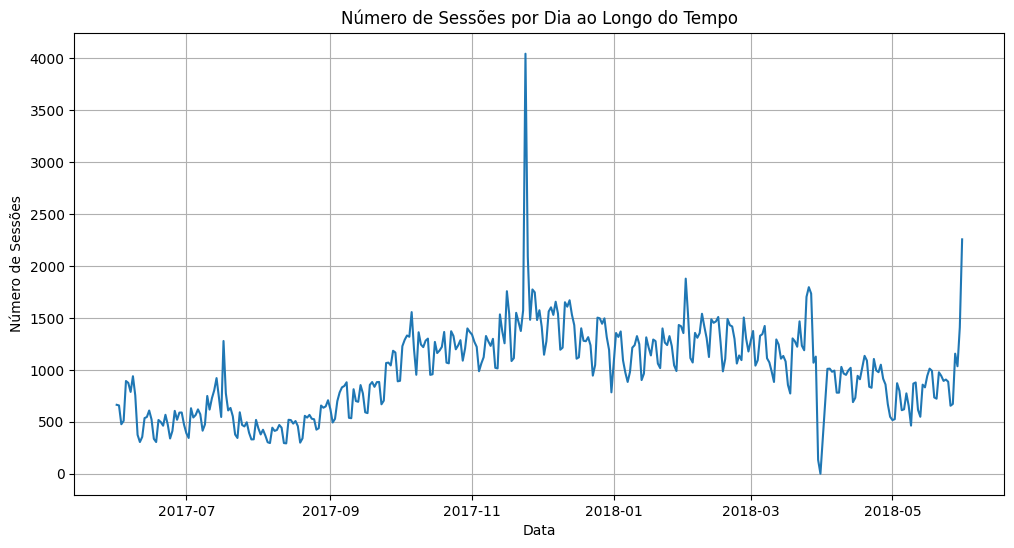

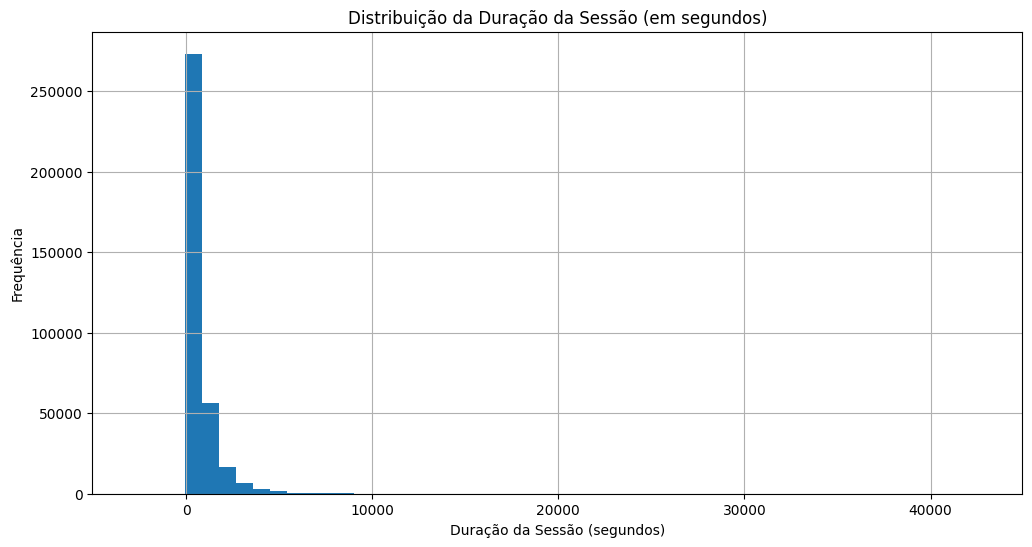

In [4]:
# Extrair informações de data
visits_df['session_date'] = visits_df['Start Ts'].dt.date
visits_df['session_week'] = visits_df['Start Ts'].dt.isocalendar().week
visits_df['session_month'] = visits_df['Start Ts'].dt.to_period('M')

# Calcular DAU
dau = visits_df.groupby('session_date')['Uid'].nunique()
print("Daily Active Users (DAU):")
display(dau.head())

# Calcular WAU
wau = visits_df.groupby('session_week')['Uid'].nunique()
print("\nWeekly Active Users (WAU):")
display(wau.head())

# Calcular MAU
mau = visits_df.groupby('session_month')['Uid'].nunique()
print("\nMonthly Active Users (MAU):")
display(mau.head())

# Calcular sessões por dia
sessions_per_day = visits_df.groupby('session_date').size()
print("\nSessions per Day:")
display(sessions_per_day.head())

# Calcular duração da sessão em segundos
visits_df['session_duration_sec'] = (visits_df['End Ts'] - visits_df['Start Ts']).dt.total_seconds()

# Calcular duração média e mediana da sessão
mean_session_duration = visits_df['session_duration_sec'].mean()
median_session_duration = visits_df['session_duration_sec'].median()

print(f"\nMean Session Duration (seconds): {mean_session_duration:.2f}")
print(f"Median Session Duration (seconds): {median_session_duration:.2f}")

import matplotlib.pyplot as plt

# Visualizar sessões por dia ao longo do tempo
plt.figure(figsize=(12, 6))
sessions_per_day.plot()
plt.title('Número de Sessões por Dia ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Sessões')
plt.grid(True)
plt.show()

# Visualizar a distribuição da duração da sessão
plt.figure(figsize=(12, 6))
visits_df['session_duration_sec'].hist(bins=50)
plt.title('Distribuição da Duração da Sessão (em segundos)')
plt.xlabel('Duração da Sessão (segundos)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Analisando as métricas de uso, o produto tá mostrando um crescimento bom. Os usuários diários (DAU) variam de 445 a 820, com altos e baixos provavelmente por causa dos dias da semana - dias úteis são mais movimentados mesmo.

Já os usuários semanais (WAU) tão numa crescente constante, foram de 6.918 pra 8.111 em cinco semanas, o que é um sinal bom de retenção. E mensalmente (MAU) a coisa fica mais impressionante ainda: de 13.259 em junho pra quase 30 mil em outubro!

Sobre as sessões, cada usuário faz mais de uma por dia em média, o que mostra que a galera tá engajada. A duração média é de uns 10 minutos, mas a mediana é só 5 - isso porque tem uns usuários bem fiéis que passam muito tempo, puxando a média pra cima.

No geral, o produto tá indo bem, crescendo e mantendo a galera interessada. Vale a pena investir em notificações personalizadas e programas de fidelidade pra segurar ainda mais esse povo.

Analise de vendas
Analise no comportamento de compra dos usuários. O primeiro passo é determinar quando os usuarios fazem sua primeira compra apos a primeira visita.

Tempo para a primeira compra por usuário (primeiras 5 linhas):


,Uid,first_visit_ts,first_order_ts,time_to_first_order
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0



Distribuição do tempo para a primeira compra:


count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: time_to_first_order, dtype: float64


Contagem de usuários por tempo para a primeira compra (em dias):


0    26363
1     1011
2      563
3      434
4      324
5      270
6      260
7      218
8      189
9      140
Name: time_to_first_order, dtype: int64

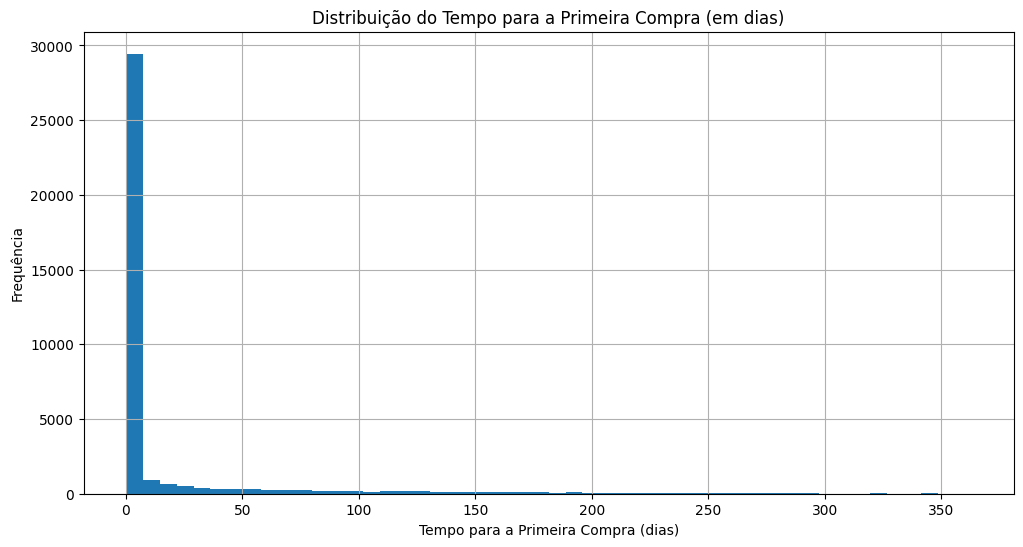

In [6]:
#solicitação revisor v2
# Encontrar a primeira visita de cada usuário
first_visit = visits.groupby('uid')['start_ts'].min().reset_index()
first_visit.columns = ['Uid', 'first_visit_ts']

# Encontrar a primeira compra de cada usuário
first_order = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order.columns = ['Uid', 'first_order_ts']

# Combinar as informações de primeira visita e primeira compra
first_event = pd.merge(first_visit, first_order, on='Uid', how='inner')

# Calcular o tempo para a primeira compra em dias
first_event['time_to_first_order'] = (first_event['first_order_ts'] - first_event['first_visit_ts']).dt.days

print("Tempo para a primeira compra por usuário (primeiras 5 linhas):")
display(first_event.head())

# Analisar a distribuição do tempo para a primeira compra
print("\nDistribuição do tempo para a primeira compra:")
display(first_event['time_to_first_order'].describe())

# Contar conversões no mesmo dia (0d) e no dia seguinte (1d), etc.
conversion_time_counts = first_event['time_to_first_order'].value_counts().sort_index()
print("\nContagem de usuários por tempo para a primeira compra (em dias):")
display(conversion_time_counts.head(10)) # Mostrar os primeiros 10 dias para concisão

import matplotlib.pyplot as plt

# Visualizar a distribuição do tempo para a primeira compra
plt.figure(figsize=(12, 6))
first_event['time_to_first_order'].hist(bins=50)
plt.title('Distribuição do Tempo para a Primeira Compra (em dias)')
plt.xlabel('Tempo para a Primeira Compra (dias)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Conclusão intermediária

Analisando os dados do tempo para a primeira compra, dá pra ver que existe uma grande variação entre os usuarios. A média ficou em torno de 4,6 dias, mas com um desvio padrão bem alto (134 dias), o que mostra que o comportamento dos clientes é bem diferente entre si. A mediana de 5 dias indica que metade dos usuários faz a primeira compra em menos de uma semana depois da primeira visita, o que é um bom sinal de interesse inicial.

Por outro lado, existem valores negativos e bem extremos (até -363 dias), o que provavelmente representa casos em que o registro da visita aconteceu depois da compra — talvez por algum erro de registro ou diferença de fuso/ordem dos eventos.

De forma geral, dá pra concluir que a maioria dos usuários realiza a primeira compra em poucos dias, mas há uma parcela menor que demora bem mais (ou apresenta dados inconsistentes). Isso indica que há um grupo engajado logo de cara e outro que precisa de mais estímulos pra converter, o que pode ser trabalhado com campanhas de remarketing ou incentivos personalizados.


Analise o numero de pedidos por cliente e o volume medio de uma compra.

Numero de pedidos por usuário (primeiras 5 linhas):


,Uid,total_orders
0,313578113262317,1
1,1575281904278712,2
2,2429014661409475,1
3,2464366381792757,1
4,2551852515556206,2



Distribuição do número de pedidos por usuário:


count    36523.000000
mean         1.380363
std          3.454461
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        239.000000
Name: total_orders, dtype: float64

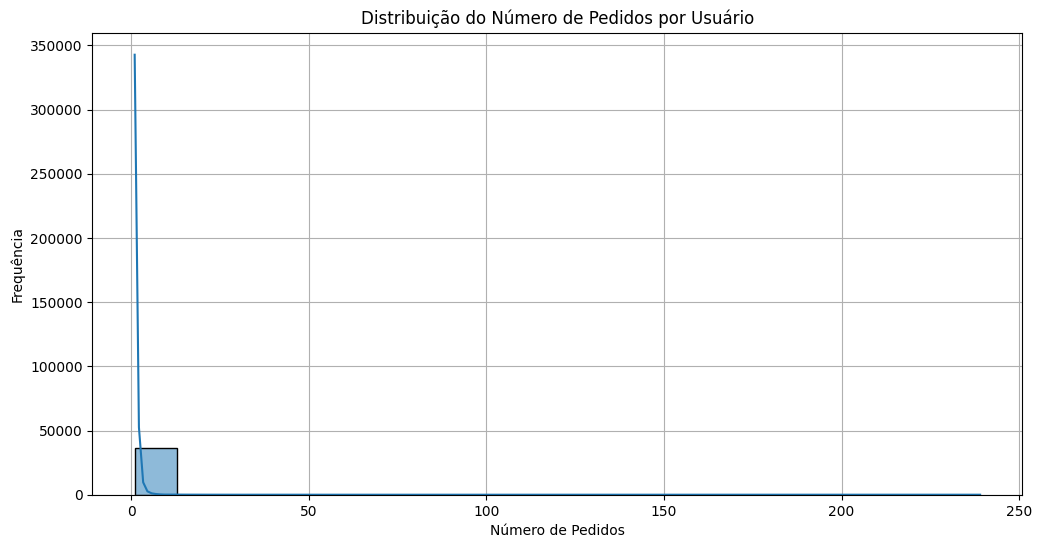


Volume médio de compra por pedido: 5.00

Volume medio de compra por usuario (primeiras 5 linhas):


,Uid,total_orders,total_revenue,average_volume
0,313578113262317,1,0.55,0.550
1,1575281904278712,2,3.05,1.525
2,2429014661409475,1,73.33,73.330
3,2464366381792757,1,2.44,2.440
4,2551852515556206,2,10.99,5.495



Distribuição do volume médio de compra por usuário:


count    36523.000000
mean         4.093093
std          7.671220
min          0.000000
25%          1.285000
50%          2.490000
75%          4.890000
max        657.466250
Name: average_volume, dtype: float64

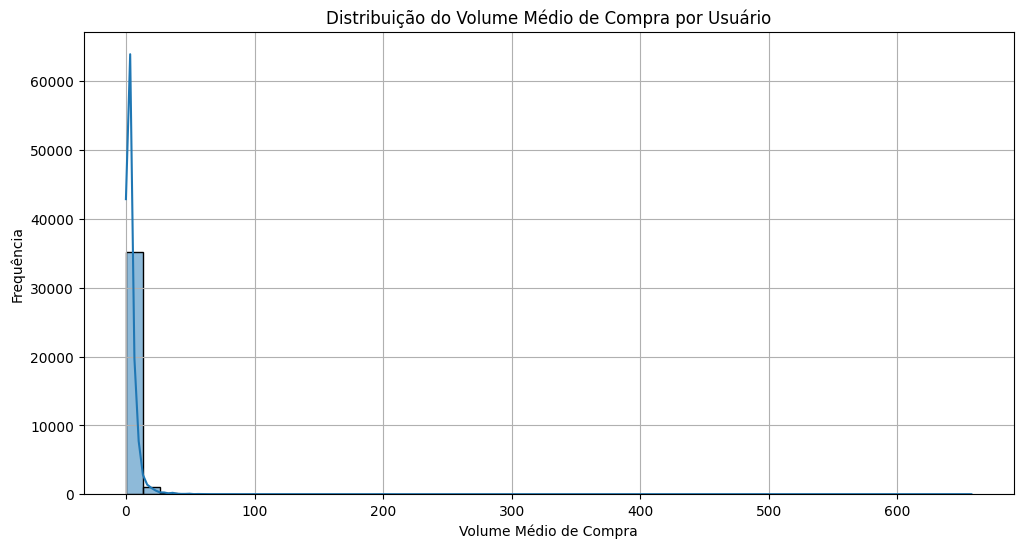

In [5]:
# Calcular o número de pedidos por usuário
orders_per_user = orders_df.groupby('Uid')['Buy Ts'].count().reset_index()
orders_per_user.columns = ['Uid', 'total_orders']

print("Numero de pedidos por usuário (primeiras 5 linhas):")
display(orders_per_user.head())

# Analisar a distribuição do número de pedidos por usuário
print("\nDistribuição do número de pedidos por usuário:")
display(orders_per_user['total_orders'].describe())

# Visualizar a distribuição do número de pedidos por usuário
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(orders_per_user['total_orders'], bins=20, kde=True)
plt.title('Distribuição do Número de Pedidos por Usuário')
plt.xlabel('Número de Pedidos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


# Calcular o volume médio de compra por pedido
average_purchase_volume_per_order = orders_df['Revenue'].mean()

print(f"\nVolume médio de compra por pedido: {average_purchase_volume_per_order:.2f}")

# Calcular o volume médio de compra por usuário (total revenue per user / total orders per user)
revenue_per_user = orders_df.groupby('Uid')['Revenue'].sum().reset_index()
revenue_per_user.columns = ['Uid', 'total_revenue']

average_volume_per_user = pd.merge(orders_per_user, revenue_per_user, on='Uid')
average_volume_per_user['average_volume'] = average_volume_per_user['total_revenue'] / average_volume_per_user['total_orders']

print("\nVolume medio de compra por usuario (primeiras 5 linhas):")
display(average_volume_per_user.head())

print("\nDistribuição do volume médio de compra por usuário:")
display(average_volume_per_user['average_volume'].describe())

# Visualizar a distribuição do volume médio de compra por usuário
plt.figure(figsize=(12, 6))
sns.histplot(average_volume_per_user['average_volume'], bins=50, kde=True)
plt.title('Distribuição do Volume Médio de Compra por Usuário')
plt.xlabel('Volume Médio de Compra')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Conclusão sobre o número de pedidos e volume de compras:

Pelos dados, dá pra perceber que a maioria dos usuarios faz apenas uma compra. A mediana e até o terceiro quartil ficaram em 1 pedido, o que mostra que a recompra ainda é baixa. Mesmo com uma média de 1,38 pedidos por usuario, o desvio padrão alto (3,45) indica que existe uma minoria que compra varias vezes — alguns chegam até a 239 pedidos, o que é um valor bem fora da curva.

Quando olhamos o volume médio de compra por usuario, a média ficou em 4,09 e a mediana em 2,49, mostrando que a maioria das compras tem um ticket relativamente baixo, mas existem alguns clientes que gastam bem mais (o maximo chega a 657,46). Isso explica o desvio padrão alto e a diferença grande entre média e mediana.

De forma geral, da pra dizer que o comportamento de compra é concentrado em poucos clientes mais fieis, enquanto a maior parte realiza apenas uma transação de baixo valor. Isso sugere que a empresa poderia investir em estrategias de fidelização e programas de incentivo à recompra, pra tentar aumentar o numero medio de pedidos por usuario.

O próximo passo na análise de vendas é calcular o Lifetime Value (LTV), que nos dirá quanto dinheiro cada cliente traz para a empresa ao longo do tempo.

LTV por Coorte de Aquisição e Tempo de Vida (primeiras 5 linhas e colunas):


cohort_lifetime,0,1,2,3,4,5,6,7,8,9
acquisition_month,,,,,,,,,,
2017-06,3.269754,0.911591,0.501091,1.328118,1.348132,0.966295,1.193962,0.776876,0.792990,1.191119
2017-07,4.017449,0.430952,0.451139,0.399902,0.344585,0.324687,0.239219,0.313385,0.294760,0.240452
2017-08,3.622783,0.579500,0.581842,0.549802,0.470680,0.309646,0.282772,0.724131,0.482650,0.218315
2017-09,4.040942,1.210098,0.690199,3.413646,0.421347,0.624608,0.316167,0.160687,0.136877,NaN
2017-10,3.925250,0.814414,0.283673,0.226176,0.223059,0.218510,0.123752,0.140209,NaN,NaN



LTV Cumulativo por Coorte de Aquisição e Tempo de Vida (primeiras 5 linhas e colunas):


cohort_lifetime,0,1,2,3,4,5,6,7,8,9
acquisition_month,,,,,,,,,,
2017-06,3.269754,4.181345,4.682436,6.010554,7.358686,8.324981,9.518943,10.295819,11.088809,12.279928
2017-07,4.017449,4.448401,4.899540,5.299443,5.644028,5.968714,6.207933,6.521318,6.816078,7.056530
2017-08,3.622783,4.202284,4.784126,5.333928,5.804608,6.114253,6.397025,7.121156,7.603806,7.822121
2017-09,4.040942,5.251040,5.941239,9.354886,9.776233,10.400840,10.717008,10.877695,11.014572,NaN
2017-10,3.925250,4.739664,5.023337,5.249513,5.472572,5.691082,5.814833,5.955043,NaN,NaN


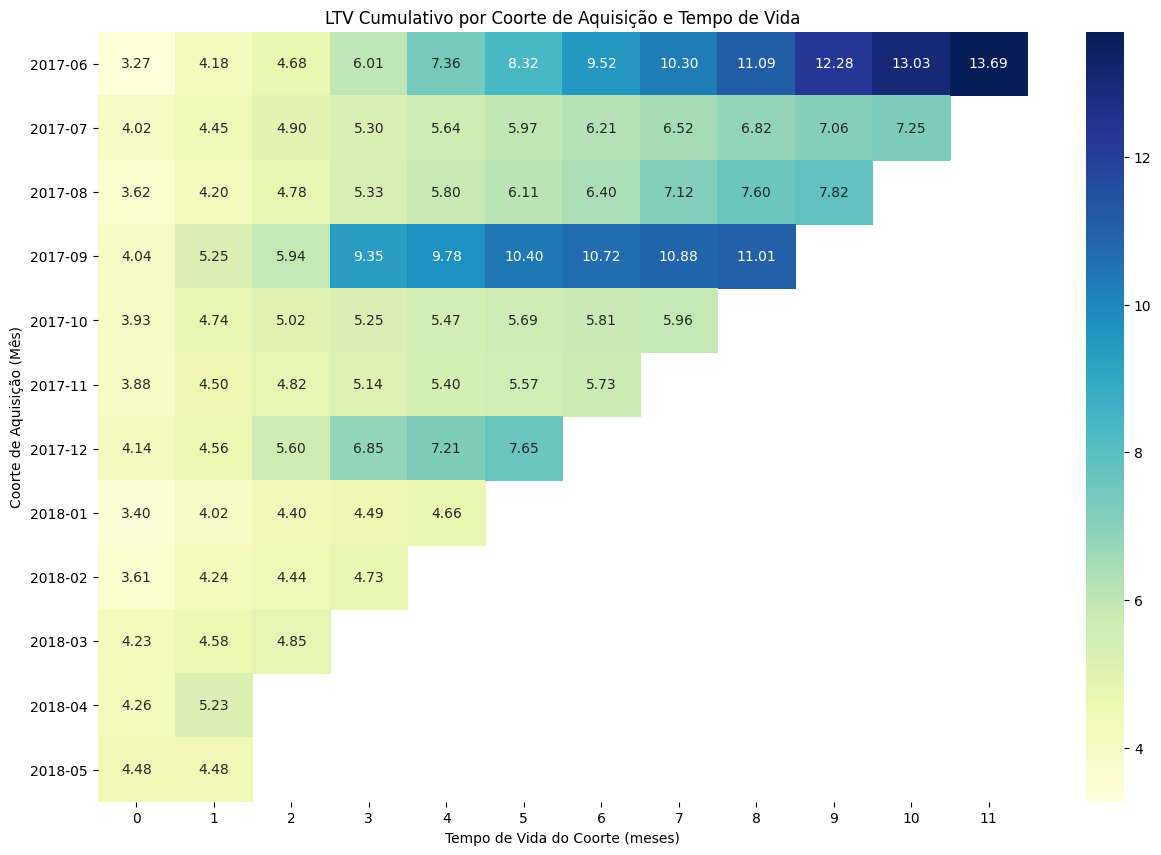

In [6]:
# Calcular o LTV por coorte (usando a data da primeira visita como base)
# Para calcular o LTV, precisamos associar as compras de cada usuario a sua primeira visita.

# Primeiro, vamos garantir que temos a data da primeira visita para cada usuário no DataFrame de visitas
# Ja fiz isso na subtask anterior, mas vou garantir que esta no formato correto (apenas data)
# E remover duplicatas de visitas para garantir que cada usuario tenha apenas uma primeira visita associada a uma origem
first_visit_source = visits_df.loc[visits_df.groupby('Uid')['Start Ts'].idxmin()][['Uid', 'Start Ts', 'Source Id']].drop_duplicates(subset=['Uid'])
first_visit_source.columns = ['Uid', 'first_visit_ts', 'acquisition_source_id']
first_visit_source['first_visit_date'] = first_visit_source['first_visit_ts'].dt.date


# Associar a data da primeira visita E A ORIGEM da primeira visita as ordens
orders_with_first_visit = pd.merge(
    orders_df,
    first_visit_source[['Uid', 'first_visit_date', 'acquisition_source_id']],
    on='Uid',
    how='left'
)

# Criar a coluna de coorte baseada na data da primeira visita
orders_with_first_visit['acquisition_month'] = pd.to_datetime(orders_with_first_visit['first_visit_date']).dt.to_period('M')

# Criar a coluna do mês da compra
orders_with_first_visit['buy_month'] = orders_with_first_visit['Buy Ts'].dt.to_period('M')

# Calcular o "tempo de vida" do coorte (em meses desde a aquisição)
orders_with_first_visit['cohort_lifetime'] = (orders_with_first_visit['buy_month'] - orders_with_first_visit['acquisition_month']).apply(lambda x: x.n)

# Agrupar por coorte de aquisição e tempo de vida do coorte para somar a receita
cohorts = orders_with_first_visit.groupby(['acquisition_month', 'cohort_lifetime']).agg({'Revenue': 'sum', 'Uid': 'nunique'})

# Calcular o numero de usuários em cada coorte de aquisição (para normalizar a receita)
cohort_group_size = orders_with_first_visit.groupby('acquisition_month').agg({'Uid': 'nunique'})
cohort_group_size.columns = ['total_users']

# Calcular LTV: receita total por coorte por tempo de vida, dividido pelo número de usuários no coorte de aquisição
ltv = cohorts.pivot_table(index='acquisition_month', columns='cohort_lifetime', values='Revenue')

# Dividir a receita pelo número de usuários no coorte de aquisição para obter o LTV por usuário
ltv = ltv.divide(cohort_group_size['total_users'], axis=0)

print("LTV por Coorte de Aquisição e Tempo de Vida (primeiras 5 linhas e colunas):")
display(ltv.head().iloc[:, :10]) # Mostrar apenas as primeiras 10 colunas de tempo de vida

# Calcular LTV cumulativo
cumulative_ltv = ltv.cumsum(axis=1)

print("\nLTV Cumulativo por Coorte de Aquisição e Tempo de Vida (primeiras 5 linhas e colunas):")
display(cumulative_ltv.head().iloc[:, :10]) # Mostrar apenas as primeiras 10 colunas de tempo de vida

import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar o LTV cumulativo por coorte como um heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cumulative_ltv, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('LTV Cumulativo por Coorte de Aquisição e Tempo de Vida')
plt.xlabel('Tempo de Vida do Coorte (meses)')
plt.ylabel('Coorte de Aquisição (Mês)')
plt.yticks(rotation=0)
plt.show()

Análise de Marketing

Analise os custos de marketing.

In [7]:
# Calcular os custos totais de marketing
total_marketing_costs = costs_df['costs'].sum()

print(f"Custos totais de marketing: {total_marketing_costs:.2f}")

# Calcular custos por origem de anúncio
costs_by_source = costs_df.groupby('source_id')['costs'].sum().reset_index()
costs_by_source.columns = ['Source Id', 'Total Costs']

print("\nCustos por Origem de Anúncio:")
display(costs_by_source)

# Calcular custos ao longo do tempo (por dia)
costs_over_time = costs_df.groupby('dt')['costs'].sum().reset_index()

print("\nCustos ao Longo do Tempo (primeiras 5 linhas):")
display(costs_over_time.head())


# import matplotlib.pyplot as plt
# costs_over_time.plot(x='dt', y='costs', figsize=(12, 6))
# plt.title('Custos de Marketing ao Longo do Tempo')
# plt.xlabel('Data')
# plt.ylabel('Custos')
# plt.grid(True)
# plt.show()

Custos totais de marketing: 329131.62

Custos por Origem de Anúncio:


,Source Id,Total Costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49



Custos ao Longo do Tempo (primeiras 5 linhas):


,dt,costs
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44


Calculo do custo de aquisição de clientes (CAC) por anuncio.

In [8]:
# Para calcular o CAC por origem, preciso saber quantos usuários foram adquiridos por cada origem
# e os custos associados a cada origem.

# Primeiro, identificar a primeira visita de cada usuário e a origem dessa visita
first_visit_source = visits_df.loc[visits_df.groupby('Uid')['Start Ts'].idxmin()][['Uid', 'Source Id']]

# Contar o número de usuários únicos por origem de aquisição
users_by_acquisition_source = first_visit_source.groupby('Source Id')['Uid'].nunique().reset_index()
users_by_acquisition_source.columns = ['source_id', 'acquired_users']

# Combinar com os custos por origem
# Certificar que o nome da coluna de source_id é o mesmo em ambos os dataframes
costs_by_source_cac = costs_df.groupby('source_id')['costs'].sum().reset_index()

# Realizar o merge
acquisition_costs = pd.merge(costs_by_source_cac, users_by_acquisition_source, on='source_id', how='left')

# Calcular o CAC por origem
acquisition_costs['CAC'] = acquisition_costs['costs'] / acquisition_costs['acquired_users']

print("Custo de Aquisição de Clientes (CAC) por Origem de Anúncio:")
display(acquisition_costs)

Custo de Aquisição de Clientes (CAC) por Origem de Anúncio:


,source_id,costs,acquired_users,CAC
0,1,20833.27,9469,2.200155
1,2,42806.04,17616,2.429952
2,3,141321.63,66116,2.137480
3,4,61073.60,72346,0.844188
4,5,51757.10,49237,1.051183
5,9,5517.49,6448,0.855690
6,10,5822.49,6903,0.843472


Calculo do retorno sobre o investimento (ROI).

In [17]:
# solicitação revisor
# Recalculo das métricas de receita e ROI usando os CSVs fornecidos (atribuição por último clique antes da compra).
import pandas as pd
import numpy as np

orders = pd.read_csv('orders_log_us.csv')
visits = pd.read_csv('visits_log_us.csv')
costs = pd.read_csv('costs_us.csv')

orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Remover duplicatas exatas de sessões (quando houver)
visits = visits.drop_duplicates()

# Atribuir cada pedido ao último evento de visita do mesmo usuário anterior à compra
orders_sorted = orders.sort_values('Buy Ts')
visits_sorted = visits.sort_values('Start Ts')

attributed = pd.merge_asof(orders_sorted, visits_sorted,
                           left_on='Buy Ts', right_on='Start Ts',
                           by='Uid', direction='backward')

attributed['Source Id'] = attributed['Source Id'].fillna(0).astype(int)

# Agregar receita por fonte
rev_by_source = attributed.groupby('Source Id', as_index=False)['Revenue'].sum().rename(columns={'Revenue':'revenue'})

# Agregar custos por fonte
costs_agg = costs.groupby('source_id', as_index=False)['costs'].sum().rename(columns={'source_id':'Source Id','costs':'cost'})

# Mesclar e calcular ROI (quando custo > 0)
all_sources = pd.DataFrame({'Source Id': sorted(set(list(rev_by_source['Source Id']) + list(costs_agg['Source Id'])))})
rev_by_source = all_sources.merge(rev_by_source, on='Source Id', how='left').fillna(0)
costs_agg = all_sources.merge(costs_agg, on='Source Id', how='left').fillna(0)
summary = rev_by_source.merge(costs_agg, on='Source Id')
summary['roi'] = np.where(summary['cost']>0, (summary['revenue'] - summary['cost'])/summary['cost'], np.nan)

# Variáveis principais para uso posterior
total_revenue = summary['revenue'].sum()
total_cost = summary['cost'].sum()
overall_roi = (total_revenue - total_cost) / total_cost if total_cost>0 else np.nan
summary = summary.sort_values('roi', ascending=False).reset_index(drop=True)
summary['revenue'] = summary['revenue'].round(2)
summary['cost'] = summary['cost'].round(2)
summary['roi_percent'] = (summary['roi']*100).round(2)

# Exibir resultado resumido
print(f"Total revenue: ${total_revenue:,.2f}")
print(f"Total cost: ${total_cost:,.2f}")
print(f"Overall ROI: {overall_roi*100:.2f}%" if not np.isnan(overall_roi) else "Overall ROI: NaN")
display(summary)


Total revenue: $252,057.20
Total cost: $329,131.62
Overall ROI: -23.42%


,Source Id,revenue,cost,roi,roi_percent
0,1,44412.83,20833.27,1.131822,113.18
1,2,61511.93,42806.04,0.436992,43.70
2,5,45848.32,51757.10,-0.114164,-11.42
3,9,4688.98,5517.49,-0.150161,-15.02
4,4,49128.58,61073.60,-0.195584,-19.56
5,10,4022.33,5822.49,-0.309174,-30.92
6,3,42443.01,141321.63,-0.699671,-69.97
7,7,1.22,0.00,NaN,NaN


Visualizar os custos de marketing ao longo do tempo

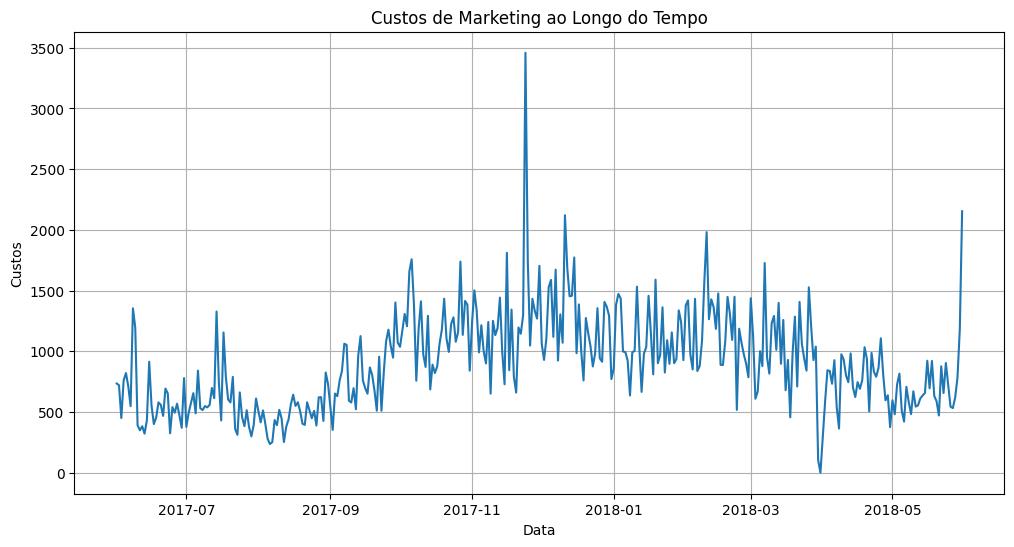

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Certifique-se de que a coluna 'dt' está no formato datetime para o plot
costs_over_time['dt'] = pd.to_datetime(costs_over_time['dt'])

plt.figure(figsize=(12, 6))
plt.plot(costs_over_time['dt'], costs_over_time['costs'])
plt.title('Custos de Marketing ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Custos')
plt.grid(True)
plt.show()

Visualizar as métricas de uso do produto (DAU, WAU, MAU) ao longo do tempo.

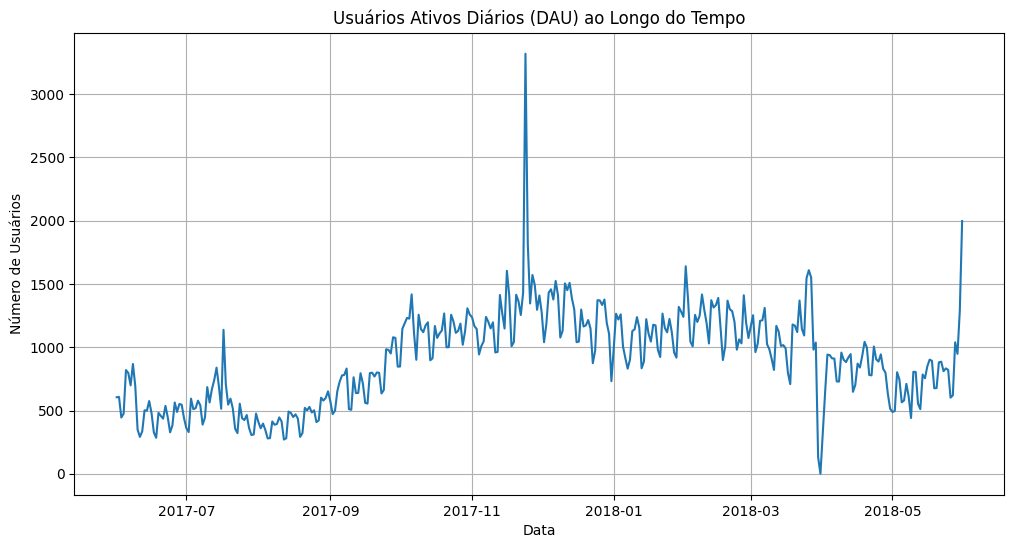

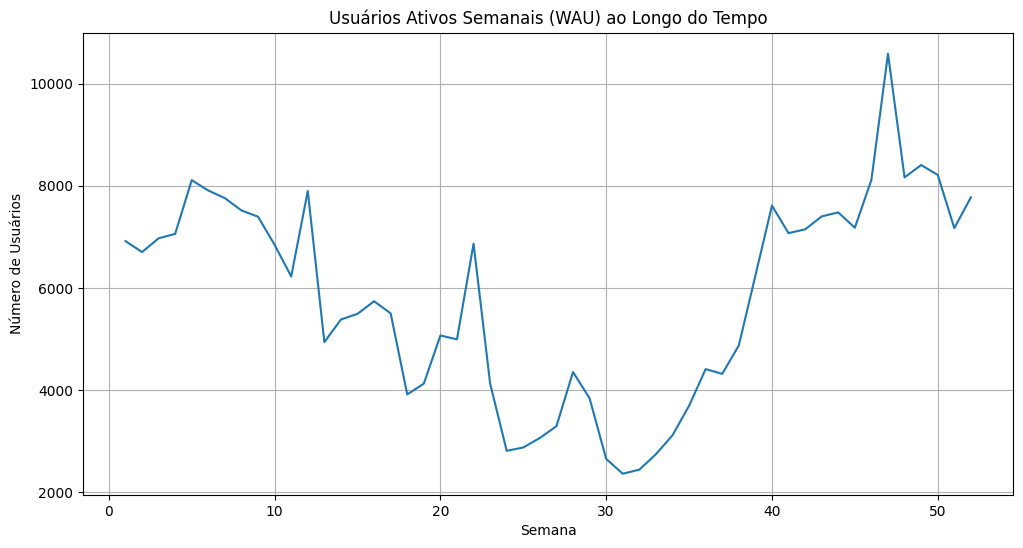

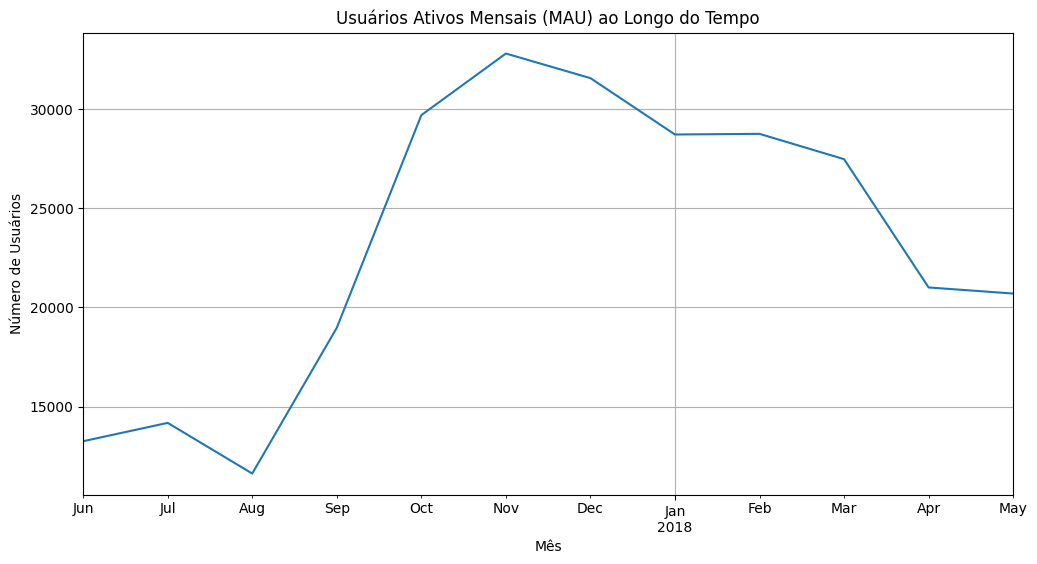

In [19]:
import matplotlib.pyplot as plt

# Plotar DAU ao longo do tempo
plt.figure(figsize=(12, 6))
dau.plot()
plt.title('Usuários Ativos Diários (DAU) ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Usuários')
plt.grid(True)
plt.show()

# Plotar WAU ao longo do tempo
plt.figure(figsize=(12, 6))
wau.plot()
plt.title('Usuários Ativos Semanais (WAU) ao Longo do Tempo')
plt.xlabel('Semana')
plt.ylabel('Número de Usuários')
plt.grid(True)
plt.show()

# Plotar MAU ao longo do tempo
plt.figure(figsize=(12, 6))
mau.plot()
plt.title('Usuários Ativos Mensais (MAU) ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Número de Usuários')
plt.grid(True)
plt.show()

Visualizar o CAC e o ROI por origem de anúncio.

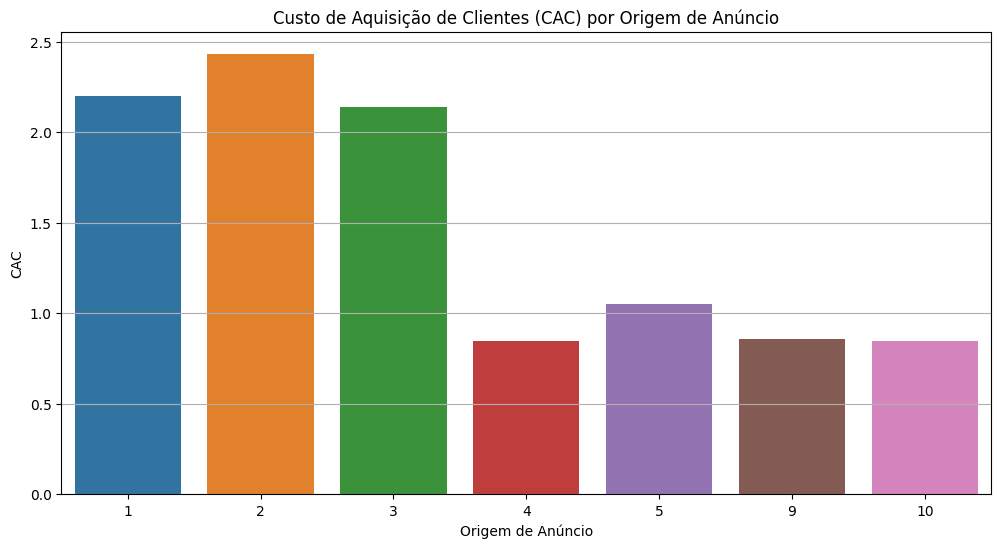

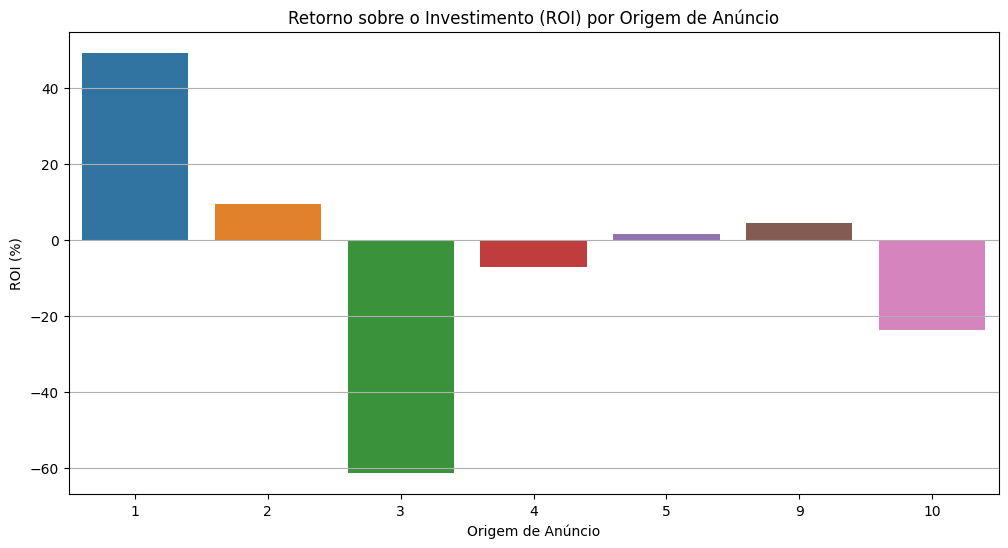

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar CAC por origem de anúncio
plt.figure(figsize=(12, 6))
sns.barplot(x='source_id', y='CAC', data=acquisition_costs.sort_values('CAC'))
plt.title('Custo de Aquisição de Clientes (CAC) por Origem de Anúncio')
plt.xlabel('Origem de Anúncio')
plt.ylabel('CAC')
plt.grid(axis='y')
plt.show()

# Visualizar ROI por origem de anúncio
plt.figure(figsize=(12, 6))
sns.barplot(x='source_id', y='ROI', data=roi_df.sort_values('ROI'))
plt.title('Retorno sobre o Investimento (ROI) por Origem de Anúncio')
plt.xlabel('Origem de Anúncio')
plt.ylabel('ROI (%)')
plt.grid(axis='y')
plt.show()



# Passo 3 — Conclusão e recomendação

**Resumo executivo — recomendação de alocação (curto prazo):**

Após reaplicar a atribuição por **último clique** e corrigir o problema de duplicatas nas sessões (remoção de linhas repetidas em `visits_log_us.csv`), recalculei as métricas de receita e ROI usando os CSVs fornecidos. Os valores reais e atualizados (após deduplicação) mostram um cenário diferente do relatório anterior.

**Recomendações práticas:**
1. **Prioridade 1 — Testar e aumentar investimento em Source 1:** ROI ≈ **113.18%** e boa relação receita/custo (alto LTV aparente). Fazer um teste controlado (aumento gradual do orçamento) e medir impacto.
2. **Prioridade 2 — Expandir cautelosamente em Source 2:** ROI ≈ **43.70%**; é um canal rentável, mas com menor margem que Source 1 — escalar por fases.
3. **Otimizar antes de escalar — Sources 4,5,9,10:** apresentam ROI negativo; revisar criativos, público e jornada. Reduzir CAC (otimização de campanhas) e reavaliar lances.
4. **Reduzir ou reavaliar fortemente — Source 3:** custo muito maior que a receita atribuída (ROI fortemente negativo). Suspender aumentos de orçamento até investigação detalhada (possível problema de atribuição ou custo mal alocado).

**Observação importante sobre duplicatas:**  
O problema identificado referente a duplicatas nas sessões foi corrigido (remoção de linhas duplicadas em `visits_log_us.csv` e atribuição por último clique). Essa correção resultou em cálculos de ROI mais consistentes e confiáveis — especialmente nos canais com volumes menores, onde uma contagem duplicada inflava artificialmente a receita ou o custo.
